In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn.metrics
import math
import datetime as dt
%matplotlib inline

PRE-PROCESSING

In [0]:
data=pd.read_csv('/AirQualityUCI.csv')
data.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [0]:
data.shape

(9357, 16)

In [0]:
data.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


Converting Date and Time to datetime

In [0]:
#data.Time=pd.to_datetime(data.Time, format="%H:%M:%S")
data['Datetime']=data.Date+' '+data.Time
data['Time']=pd.to_datetime(data.Datetime)
data.dtypes

Date                    object
Time            datetime64[ns]
CO_GT                  float64
PT08_S1_CO               int64
NMHC_GT                  int64
C6H6_GT                float64
PT08_S2_NMHC             int64
Nox_GT                   int64
PT08_S3_Nox              int64
NO2_GT                   int64
PT08_S4_NO2              int64
PT08_S5_O3               int64
T                      float64
RH                     float64
AH                     float64
CO_level                object
Datetime                object
dtype: object

Removing Date and Datetime column

In [0]:
data.drop('Date', axis=1, inplace=True)
data.drop('Datetime', axis=1, inplace=True)
data.drop('CO_level', axis=1, inplace=True)

**This column seems to have wrong or misplaced data, hence we are removing it**

In [0]:
data.drop('NMHC_GT', axis=1, inplace=True)
data.head()

,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,2004-11-23 19:00:00,11.9,2008,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741
1,2004-11-23 20:00:00,11.5,1918,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324
2,2004-11-17 18:00:00,10.2,1802,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244
3,2004-11-23 18:00:00,10.2,1982,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936
4,2004-11-26 18:00:00,10.1,1956,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979


There seems to be lot of -200 for some reason, this is most likely an error, so we remove those values

In [0]:
data.replace(to_replace= -200, value= np.NaN, inplace= True)

**Method to fill empty spaces**

In [0]:
def VALUE_CORRECTION(col):
    data[col] = data.groupby('Time')[col].transform(lambda x:x.fillna(x.mean()))

Applying the value correction method in all the numeric columns

In [0]:
col_list = data.columns[1:12]

for i in col_list:
    VALUE_CORRECTION(i)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          9357 non-null   datetime64[ns]
 1   CO_GT         7674 non-null   float64       
 2   PT08_S1_CO    8991 non-null   float64       
 3   C6H6_GT       8991 non-null   float64       
 4   PT08_S2_NMHC  8991 non-null   float64       
 5   Nox_GT        7718 non-null   float64       
 6   PT08_S3_Nox   8991 non-null   float64       
 7   NO2_GT        7715 non-null   float64       
 8   PT08_S4_NO2   8991 non-null   float64       
 9   PT08_S5_O3    8991 non-null   float64       
 10  T             8991 non-null   float64       
 11  RH            8991 non-null   float64       
 12  AH            8991 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 950.4 KB


The parameter "ffill" stands for 'forward fill' and will propagate last valid observation forward

In [0]:
data.fillna(method='ffill', inplace= True)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Time          9357 non-null   datetime64[ns]
 1   CO_GT         9357 non-null   float64       
 2   PT08_S1_CO    9357 non-null   float64       
 3   C6H6_GT       9357 non-null   float64       
 4   PT08_S2_NMHC  9357 non-null   float64       
 5   Nox_GT        9357 non-null   float64       
 6   PT08_S3_Nox   9357 non-null   float64       
 7   NO2_GT        9357 non-null   float64       
 8   PT08_S4_NO2   9357 non-null   float64       
 9   PT08_S5_O3    9357 non-null   float64       
 10  T             9357 non-null   float64       
 11  RH            9357 non-null   float64       
 12  AH            9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 950.4 KB


### **Visualisations**

## CO_GT

In [0]:
fig = px.scatter(data, x="Time", y="CO_GT", title="Hourly Averaged concentration CO (mg/m^3) at various times of Day")
fig.show()

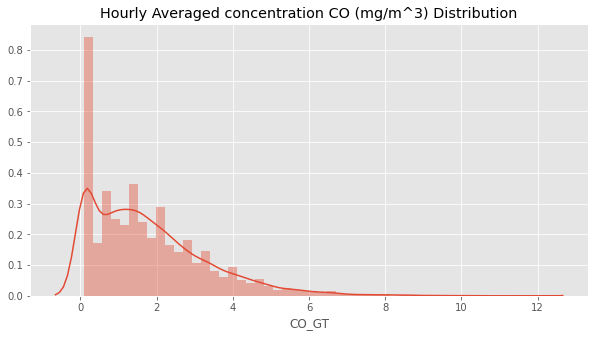

In [0]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title("Hourly Averaged concentration CO (mg/m^3) Distribution")
sns.distplot(data['CO_GT'])

## PT08_S1_CO

In [0]:
fig = px.scatter(data, x="Time",y="PT08_S1_CO", title="PT08.S1 (tin oxide) Hourly Averaged sensor response at various times of Day")
fig.show()

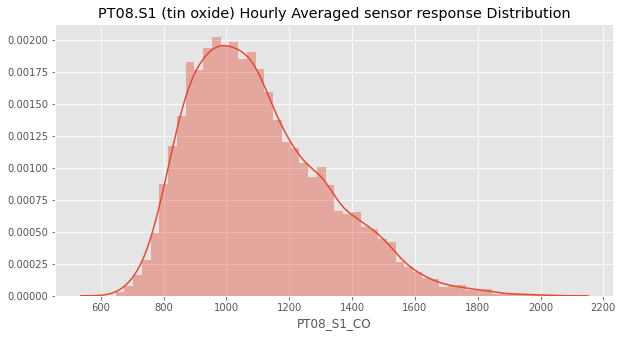

In [0]:
plt.figure(figsize=(10,5))
plt.title("PT08.S1 (tin oxide) Hourly Averaged sensor response Distribution")
sns.distplot(data['PT08_S1_CO'])

## PT08_S2_NMHC

In [0]:
fig = px.scatter(data, x="Time",y="PT08_S2_NMHC", title="Hourly Averaged overall HydroCarbons concentration (microg/m^3) at various times of Day")
fig.show()

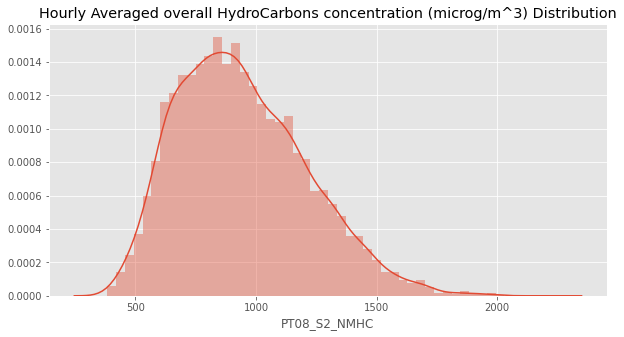

In [0]:
plt.figure(figsize=(10,5))
plt.title("Hourly Averaged overall HydroCarbons concentration (microg/m^3) Distribution")
sns.distplot(data['PT08_S2_NMHC'])

## C6H6_GT

In [0]:
fig = px.scatter(data, x="Time",y="C6H6_GT", title="Hourly Averaged C6H6 concentration (microg/m^3) at various times of Day")
fig.show()

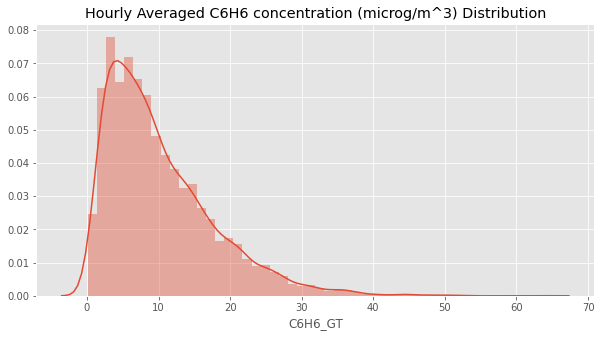

In [0]:
plt.figure(figsize=(10,5))
plt.title("Hourly Averaged C6H6 concentration (microg/m^3) Distribution")
sns.distplot(data['C6H6_GT'])

## Absolute Humidity vs Temperature

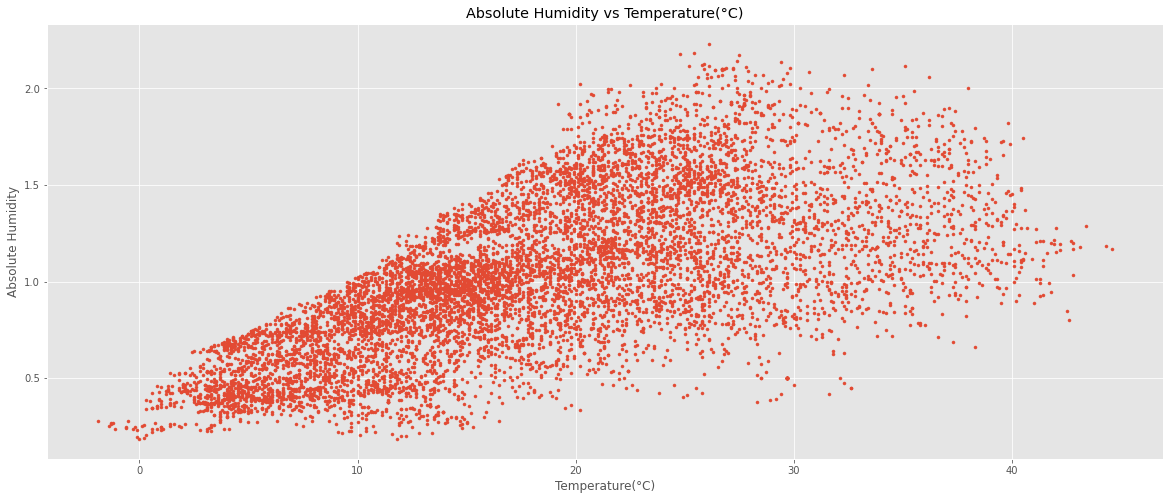

In [0]:
plt.figure(figsize=(20,8))
plt.xlabel('Temperature(°C)')
plt.ylabel('Absolute Humidity')
plt.title("Absolute Humidity vs Temperature(°C)")
plt.scatter(data['T'], data['AH'], marker='.', aa=True)

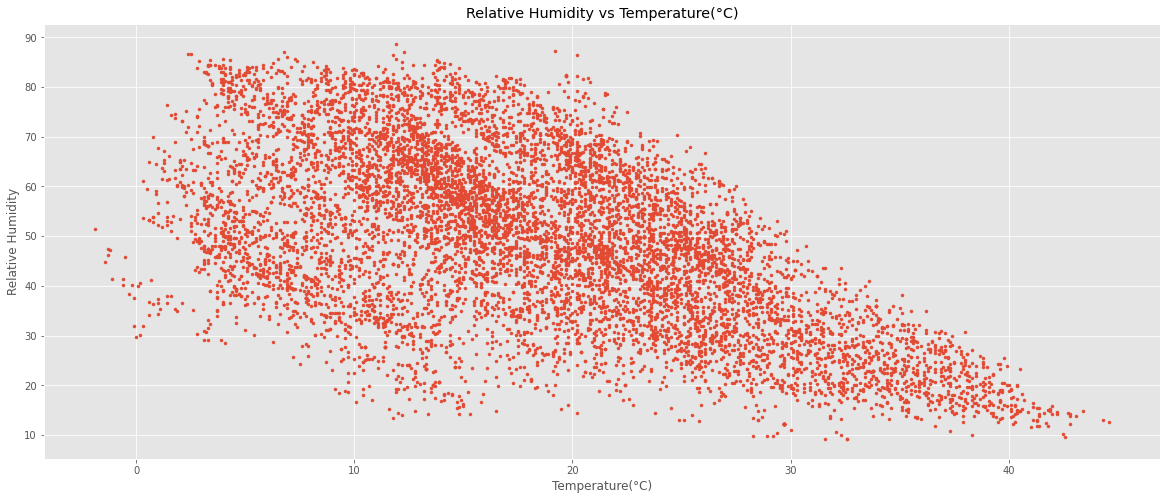

In [0]:
plt.figure(figsize=(20,8))
plt.xlabel('Temperature(°C)')
plt.ylabel('Relative Humidity')
plt.title("Relative Humidity vs Temperature(°C)")
plt.scatter(data['T'], data['RH'], marker='.', aa=True)

In [0]:
data.corr()   #Correlation matrix

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
CO_GT,1.000000,0.742656,0.742937,0.734122,0.797946,-0.584458,0.719526,0.449841,0.731593,-0.064152,0.037733,-0.065509
PT08_S1_CO,0.742656,1.000000,0.883386,0.893284,0.644423,-0.773145,0.559338,0.674697,0.899619,0.040497,0.114944,0.122205
C6H6_GT,0.742937,0.883386,1.000000,0.982108,0.625467,-0.732533,0.503541,0.756172,0.863059,0.192452,-0.062450,0.154787
PT08_S2_NMHC,0.734122,0.893284,0.982108,1.000000,0.614127,-0.794214,0.531100,0.768655,0.878570,0.234110,-0.091081,0.173709
Nox_GT,0.797946,0.644423,0.625467,0.614127,1.000000,-0.584071,0.790815,0.165364,0.719673,-0.293734,0.181551,-0.211291
PT08_S3_Nox,-0.584458,-0.773145,-0.732533,-0.794214,-0.584071,1.000000,-0.553720,-0.532673,-0.794948,-0.136713,-0.055650,-0.219586
NO2_GT,0.719526,0.559338,0.503541,0.531100,0.790815,-0.553720,1.000000,0.075640,0.623643,-0.240598,-0.080228,-0.382144
PT08_S4_NO2,0.449841,0.674697,0.756172,0.768655,0.165364,-0.532673,0.075640,1.000000,0.575636,0.565389,-0.029725,0.630227
PT08_S5_O3,0.731593,0.899619,0.863059,0.878570,0.719673,-0.794948,0.623643,0.575636,1.000000,-0.040626,0.123999,0.051048
T,-0.064152,0.040497,0.192452,0.234110,-0.293734,-0.136713,-0.240598,0.565389,-0.040626,1.000000,-0.572336,0.659795


Creating Linear Regression Model

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X=data[['CO_GT', 'PT08_S1_CO',	'C6H6_GT',	'PT08_S2_NMHC',	'Nox_GT',	'PT08_S3_Nox',	'NO2_GT',	'PT08_S4_NO2',	'PT08_S5_O3',	'T']]
y=data[['RH','AH']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

In [0]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(normalize="Boolean")
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='Boolean')

In [0]:
y_pred=reg.predict(X_test)
y_pred

array([[56.05009429,  1.71548106],
       [60.61576846,  0.81316646],
       [31.51807342,  1.49190983],
       ...,
       [54.13671914,  0.52232146],
       [33.85326606,  0.26055371],
       [53.13506457,  0.46109626]])

In [0]:
y_test

,RH,AH
2610,52.5,1.9138
6347,63.5,0.7268
4058,33.4,1.7186
3739,33.9,0.3832
2214,78.6,0.6826
...,...,...
1833,30.8,0.7696
7430,52.5,1.0130
5224,62.3,0.6227
3491,23.8,0.2955


In [0]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.792111031291182


In [0]:
reg.intercept_

array([85.87472667,  1.54543548])

In [0]:
reg.coef_

array([[-1.38190142e+00,  5.05054185e-03, -6.34433035e-01,
        -6.21599950e-02,  4.95865288e-02, -2.77995794e-02,
        -1.42037629e-01,  5.69555543e-02,  2.25600040e-03,
        -1.81364501e+00],
       [-1.89074119e-02, -1.72708557e-04,  2.97491545e-03,
        -1.82245077e-03,  8.85470146e-04, -7.99285201e-04,
        -3.01844867e-03,  1.22739552e-03,  1.17577273e-04,
         1.43186503e-02]])

## Creating a predicted values column for visualisation

In [0]:
X=data[['CO_GT', 'PT08_S1_CO',	'C6H6_GT',	'PT08_S2_NMHC',	'Nox_GT',	'PT08_S3_Nox',	'NO2_GT',	'PT08_S4_NO2',	'PT08_S5_O3',	'T']]
y_pred_all=reg.predict(X)
data['RH_pred']=y_pred_all[:,0]
data['AH_pred']=y_pred_all[:,1]
data

,Time,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,RH_pred,AH_pred
0,2004-11-23 19:00:00,11.9,2008.0,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,81.699518,1.419313
1,2004-11-23 20:00:00,11.5,1918.0,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,82.926698,1.404494
2,2004-11-17 18:00:00,10.2,1802.0,47.7,1924.0,748.0,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,38.925411,0.702805
3,2004-11-23 18:00:00,10.2,1982.0,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,81.185581,1.439220
4,2004-11-26 18:00:00,10.1,1956.0,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,70.066967,1.294658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-03-23 04:00:00,0.1,993.0,2.3,604.0,85.0,848.0,65.0,1160.0,762.0,14.5,66.4,1.0919,64.645920,1.200392
9353,2005-03-26 04:00:00,0.1,1122.0,6.0,811.0,181.0,641.0,92.0,1336.0,1122.0,16.2,71.2,1.3013,64.515864,1.263523
9354,2005-03-29 04:00:00,0.1,883.0,1.3,530.0,63.0,997.0,46.0,1102.0,617.0,13.7,68.2,1.0611,64.610681,1.170361
9355,2005-04-01 04:00:00,0.1,818.0,0.8,473.0,47.0,1257.0,41.0,898.0,323.0,13.7,48.8,0.7606,48.549448,0.792133


### sklearn Visualisation

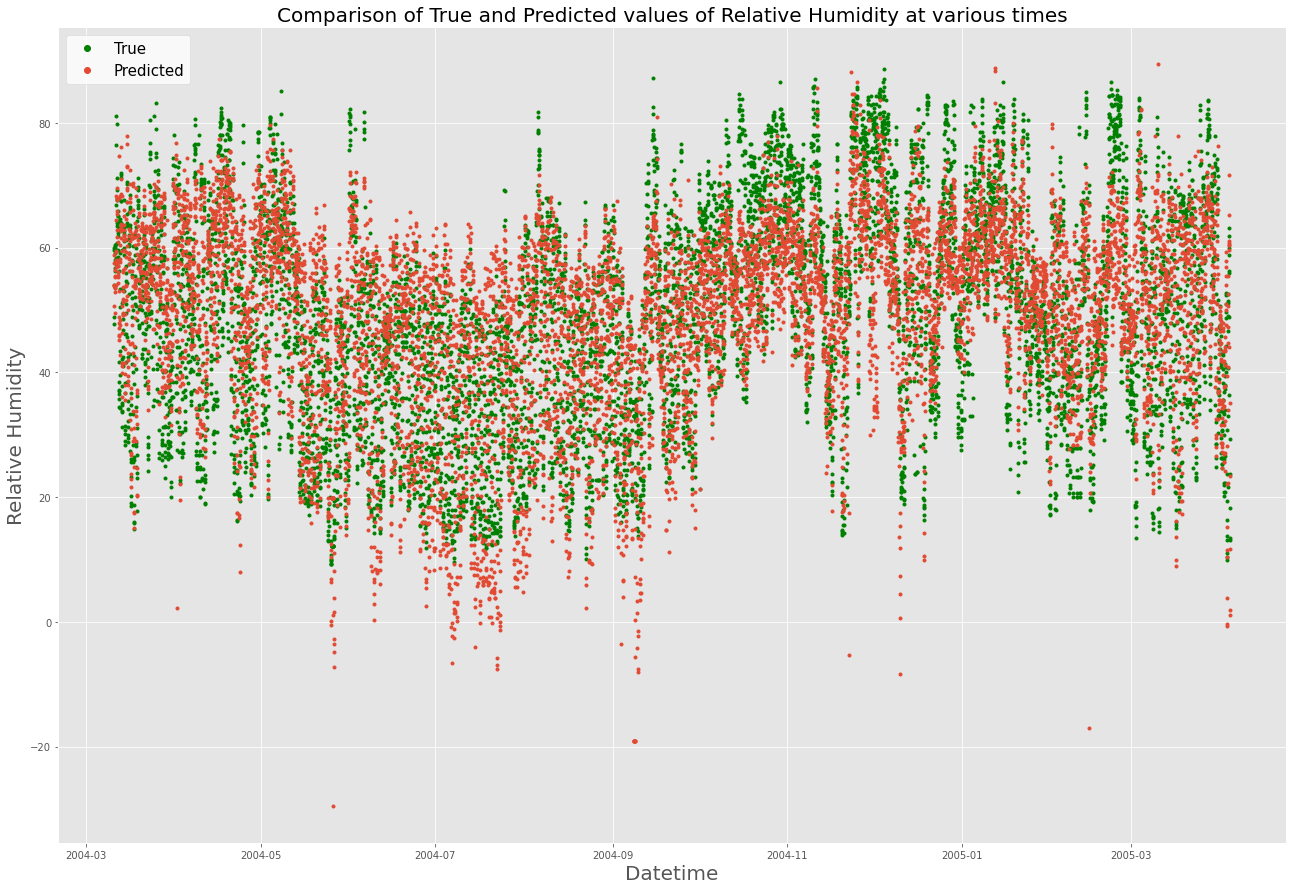

In [0]:
plt.figure(figsize=(22,15))
plt.plot_date(data.Time, data.RH, marker='.', color='g', label="True")
plt.plot_date(data.Time, data.RH_pred, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Relative Humidity at various times", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Relative Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='white', markerscale=2)

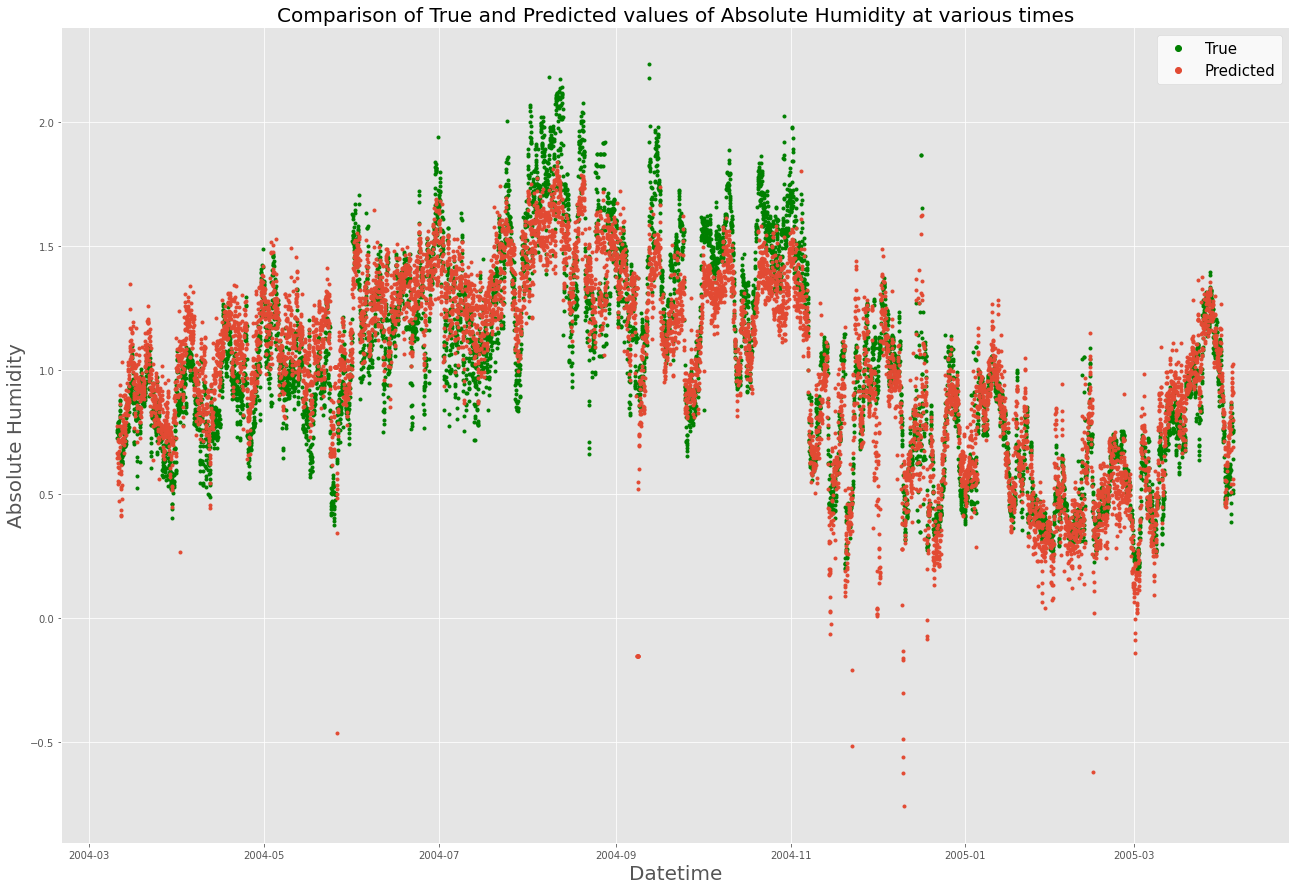

In [0]:
plt.figure(figsize=(22,15))
plt.plot_date(data.Time, data.AH, marker='.', color='g', label="True")
plt.plot_date(data.Time, data.AH_pred, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Absolute Humidity at various times", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Absolute Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='white', markerscale=2)

HYPERPARAMETER optimization

In [0]:
#Hypergrid parameters
n_estimators=[100,200,500,750,1000,1100,1200]
max_depth=[3,5,10,15,20]
booster=['gbtree']
learning_rate=[0.03, 0.06, 0.1, 0.15, 0.2]
min_child_weight=[1,2,3,4]
base_score=[0.2,0.25, 0.5, 0.75]

hyperparameter_grid={'n_estimators':n_estimators,
                     'max_depth':max_depth,
                     'learning_rate':learning_rate,
                     'min_child_weight':min_child_weight,
                     'booster':booster,
                     'base_score':base_score}

In [0]:
import xgboost
xreg=xgboost.XGBRegressor()

## Optimization for RH

In [0]:
y1=data[['RH']]
X_train, X_test, y1_train, y1_test=train_test_split(X, y1, test_size=0.3)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
#FOR RH
random_cv1=RandomizedSearchCV(estimator=xreg,
                             param_distributions=hyperparameter_grid,
                             n_iter=50,
                             verbose=5,
                             n_jobs=4,
                             scoring='neg_mean_squared_error',
                             return_train_score=True,
                             random_state=42)

In [0]:
random_cv1.fit(X_train, y1_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  8.7min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 17.7min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 25.3min finished


[09:00:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alp...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.2, 0.25, 0.5, 0.75],
                                        'booster': [

In [0]:
random_cv1.best_estimator_

XGBRegressor(base_score=0.2, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=1200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
#for RH
xreg=xgboost.XGBRegressor(base_score=0.2, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=1200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xreg.fit(X_train, y1_train)

[09:03:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.2, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=2, missing=None, n_estimators=1200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y1_pred=xreg.predict(X_test)
y1_pred

array([73.63452 , 23.34982 , 63.871006, ..., 16.81169 , 58.42068 ,
       57.43062 ], dtype=float32)

In [0]:
y1_test

,RH
2193,73.0
1279,20.0
4652,65.7
100,59.7
9022,61.0
...,...
718,50.1
1465,69.1
2483,20.4
7179,54.5


In [0]:
r2_score(y1_test, y1_pred)

0.9354045181258757

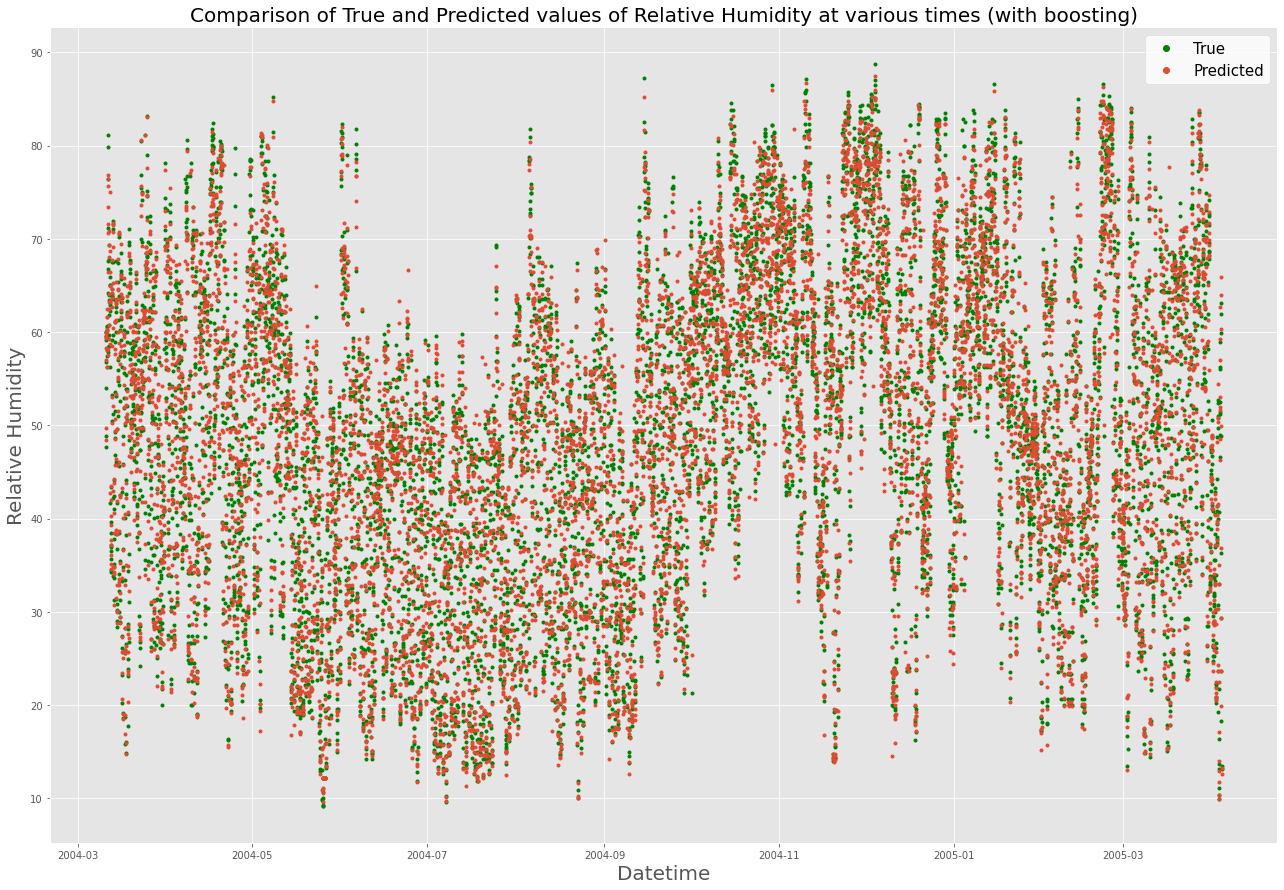

In [0]:
data['RH_pred_xg']=xreg.predict(X)
plt.figure(figsize=(22,15))
plt.plot_date(data.Time, data.RH, marker='.', color='g', label="True")
plt.plot_date(data.Time, data.RH_pred_xg, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Relative Humidity at various times (with boosting)", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Relative Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='white', markerscale=2)

## Optimization for AH

In [0]:
y2=data[['AH']]
X_train, X_test, y2_train, y2_test=train_test_split(X, y2, test_size=0.3)

In [0]:
#FOR AH
xreg=xgboost.XGBRegressor()
random_cv2=RandomizedSearchCV(estimator=xreg,
                             param_distributions=hyperparameter_grid,
                             n_iter=50,
                             verbose=5,
                             n_jobs=4,
                             scoring='neg_mean_squared_error',
                             return_train_score=True,
                             random_state=42)

In [0]:
random_cv2.fit(X_train, y2_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 11.7min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 16.3min finished


[07:29:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alp...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.2, 0.25, 0.5, 0.75],
                                        'booster': [

In [0]:
random_cv2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
xreg=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xreg.fit(X_train, y2_train)

[07:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.06, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
y2_pred=xreg.predict(X_test)
y2_pred

array([0.92418647, 1.0036654 , 0.98896396, ..., 0.351473  , 0.76352346,
       0.9795269 ], dtype=float32)

In [0]:
y2_test

,AH
1799,0.8754
1827,1.0618
650,0.7873
6541,1.0592
9289,0.4480
...,...
3629,1.4313
6210,1.7898
4986,0.3286
6346,0.7793


In [0]:
r2_score(y2_test, y2_pred)

0.9537818199981379

# **Visualisation for AH vs Datetime(Boosted)**

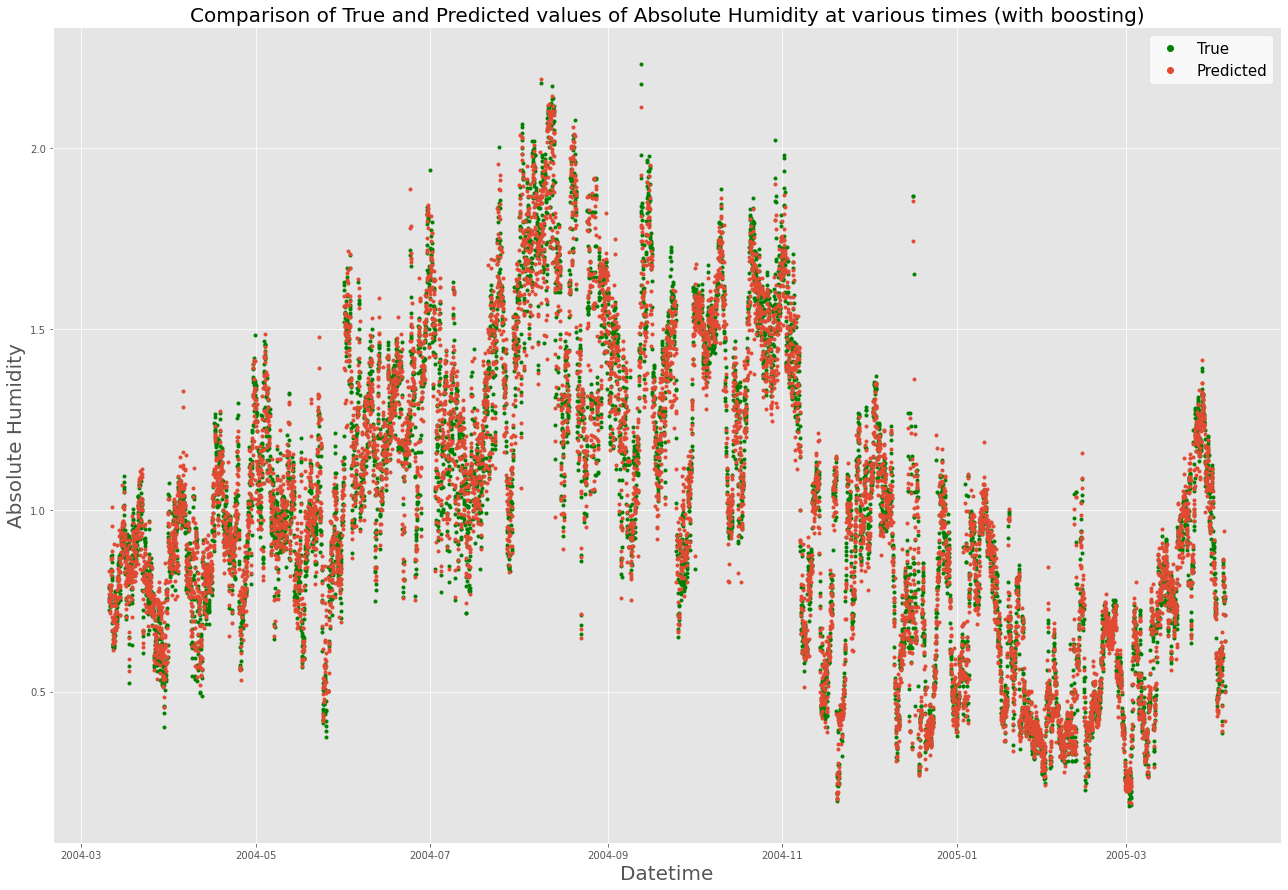

In [0]:
data['AH_pred_xg']=xreg.predict(X)
plt.figure(figsize=(22,15))
plt.plot_date(data.Time, data.AH, marker='.', color='g', label="True")
plt.plot_date(data.Time, data.AH_pred_xg, marker='.', label="Predicted")
plt.title("Comparison of True and Predicted values of Absolute Humidity at various times (with boosting)", fontsize=20)
plt.xlabel("Datetime", fontsize=20)
plt.ylabel("Absolute Humidity", fontsize=20)
plt.legend(fontsize=15, facecolor='white', markerscale=2)